# Линейная алгебра: сходство текстов и аппроксимация функций

Данное задание основано на материалах секции, посвященной введению в линейную алгебру. Вам понадобится компьютер с установленным интерпретатором Python и подключенными библиотеками NumPy и SciPy.

Вы научитесь:
- читать тексты из файла с помощью Python и разбивать их на слова;
- переводить тексты в векторные пространства, вычислять расстояния в этих пространствах;
- решать системы линейных уравнений;
- приближать любые функции с помощью многочленов.


## Введение
В этом задании вы познакомитесь с некоторыми базовыми методами из линейной алгебры, реализованными в пакете SciPy — в частности, с методами подсчета косинусного расстояния и решения систем линейных уравнений. Обе эти задачи еще много раз встретятся нам в специализации. Так, **на решении систем линейных уравнений основана настройка линейных моделей** — очень большого и важного класса алгоритмов машинного обучения. **Косинусное расстояние же часто используется в анализе текстов для измерения сходства между ними**.

## Материалы
- Справка по функциям пакета scipy.linalg: http://docs.scipy.org/doc/scipy/reference/linalg.html
- Справка по работе с файлами в Python: https://docs.python.org/2/tutorial/inputoutput.html#reading-and-writing-files
- Справка по регулярным выражениям в Python (если вы захотите узнать про них чуть больше): https://docs.python.org/2/library/re.html



## Инструкция по выполнению
Данное задание состоит из двух частей. В каждой ответом будет набор чисел, который вам нужно будет ввести в соответствующее поле через пробел.

### Задача 1: сравнение предложений
Дан набор предложений, скопированных с Википедии. Каждое из них имеет "кошачью тему" в одном из трех смыслов:
- кошки (животные)
- UNIX-утилита cat для вывода содержимого файлов
- версии операционной системы OS X, названные в честь семейства кошачьих

**Ваша задача — найти два предложения, которые ближе всего по смыслу к расположенному в самой первой строке. В качестве меры близости по смыслу мы будем использовать косинусное расстояние.**

Выполните следующие шаги:

1. Скачайте файл с предложениями (sentences.txt). 
2. Каждая строка в файле соответствует одному предложению. Считайте их, приведите каждую к нижнему регистру с помощью строковой функции lower().
3. Произведите токенизацию, то есть разбиение текстов на слова. Для этого можно воспользоваться регулярным выражением, которое считает разделителем любой символ, не являющийся буквой: `re.split('[^a-z]', t)`. Не забудьте удалить пустые слова после разделения.
4. Составьте список всех слов, встречающихся в предложениях. Сопоставьте каждому слову индекс от нуля до (d - 1), где d — число различных слов в предложениях. Для этого удобно воспользоваться структурой dict.
5. Создайте матрицу размера n * d, где n — число предложений. Заполните ее: элемент с индексом (i, j) в этой матрице должен быть равен количеству вхождений j-го слова в i-е предложение. У вас должна получиться матрица размера 22 * 254.
6. Найдите косинусное расстояние от предложения в самой первой строке (In comparison to dogs, cats have not undergone...) до всех остальных с помощью функции scipy.spatial.distance.cosine. Какие номера у двух предложений, ближайших к нему по этому расстоянию (строки нумеруются с нуля)? Эти два числа и будут ответами на задание. Само предложение (In comparison to dogs, cats have not undergone... ) имеет индекс 0.
7. Запишите полученные числа в файл, разделив пробелом. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-1.txt).
8. Совпадают ли ближайшие два предложения по тематике с первым? Совпадают ли тематики у следующих по близости предложений?

Разумеется, использованный вами метод крайне простой. Например, он не учитывает формы слов (так, cat и cats он считает разными словами, хотя по сути они означают одно и то же), не удаляет из текстов артикли и прочие ненужные слова. Позже мы будем подробно изучать анализ текстов, где выясним, как достичь высокого качества в задаче поиска похожих предложений.

In [76]:
# Ознакомимся с текстом
# !more sentences.txt

In [ ]:
# Загрузка необходимой библиотеки
import re
from collections import Counter

In [64]:
# Способ 1. Применение функции file_object.readlines()
# with open ('sentences.txt') as sentences:
#     lines_list = sentences.readlines()
    
# len(lines_list)

In [65]:
# # Способ 2. Применение цикла for  
# lines_list = []
# with open ('sentences.txt') as sentences:
#     for line in sentences:
#         lines_list.append(line)
        
# len(lines_list)

In [66]:
# # Способ 3. Работа со строками файла как с массивом
# with open ('sentences.txt') as sentences:
#     lines_list = list(sentences)

In [67]:
# 1. Скачайте файл с предложениями (sentences.txt).
# 2. Каждая строка в файле соответствует одному предложению. Считайте их, приведите каждую к нижнему регистру с помощью строковой функции lower().
with open ('sentences.txt') as sentences:
    lines_list = list(sentences)
    
lines_list = [line.lower() for line in lines_list]

In [75]:
# 3. Произведите токенизацию, то есть разбиение текстов на слова. Для этого можно воспользоваться регулярным выражением, которое считает разделителем любой символ, не являющийся буквой: re.split('[^a-z]', t). Не забудьте удалить пустые слова после разделения.

In [79]:
# разбиваем каждое прелдожение на слова - получаем 2-мерный массив, список списков: в списке прелдожений есть списки слов для каждого предложения
splitted_lines = []
for line in range(len(lines_list)):
    splitted_lines.append(re.split(pattern='[^a-z]', string=lines_list[line]))

In [86]:
len(splitted_lines)

22

1. Нужно составить список вообще всех слов во всех продложениях - это будут столбцы матрицы
2. Количество строк 22 - это количество предложений в файле.

In [166]:
# Посчитаем количество уникальных слов во всех предложениях

# Сначала сделаем одномерный массив из нашего списка списков
# https://stackoverflow.com/questions/952914/how-to-make-a-flat-list-out-of-a-list-of-lists
flattened_list = [word for sublist in splitted_lines for word in sublist]

# Затем посчитаем количество уникальных слов во всех предложениях с помощью collections.Counter 
all_words_count = Counter(flattened_list)

# Удалим "слова" без символов 
del all_words_count['']

# массив со всеми словами
all_words = all_words_count.keys()

# проверис количество уникальных слов. Судя по описанию зажания их должно быть 254
len(all_words)

254

In [167]:
# будем считать количество повторений каждого из слов all_words в каждом предложении sentence
future_dataframe = {}

for word in all_words:
    tmp_column = [] # списоск, который представляет из себя колонку будущей таблицы
    for sentence in splitted_lines:
        tmp_column.append(sentence.count(word))
    
    future_dataframe[f'{word}'] = tmp_column

In [168]:
import pandas as pd

In [169]:
df = pd.DataFrame(future_dataframe)

In [170]:
df.shape

(22, 254)

In [217]:
from scipy.spatial import distance

In [222]:
distances = [distance.cosine(df.iloc[0], df.iloc[i]) for i in range(df.shape[0])]

In [223]:
df['distances'] = distances

In [228]:
sorted = df.sort_values(by=['distances'], ascending=True)
sorted.head(3)

,in,comparison,to,dogs,cats,have,not,undergone,major,changes,...,run,off,external,drive,fifth,update,features,more,count,distances
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0.000000
6,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.735563
4,2,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.779959


In [240]:
# запись результата в файл
with open ('linear_algebra_task-1.txt', 'w') as file:
    file.write(str(sorted.index[1])+' '+str(sorted.index[2]))

In [243]:
# Проверяем, что записали
with open ('linear_algebra_task-1.txt', 'r') as file:
    for line in file:
        print(line) 

6 4


In [197]:
lines_list[6]

'domestic cats are similar in size to the other members of the genus felis, typically weighing between 4 and 5 kg (8.8 and 11.0 lb).\n'

In [198]:
lines_list[4]

'in one, people deliberately tamed cats in a process of artificial selection, as they were useful predators of vermin.\n'

### Задача 2: аппроксимация функции

Рассмотрим сложную математическую функцию на отрезке [1, 15]:

$$f(x) = sin(\frac{x}{5})\times \exp(x/10) + 5\times \exp(-x / 2)$$


Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, **задача** машинного обучения **состоит в том, чтобы приблизить сложную зависимость с помощью функции** из определенного семейства. **В этом задании мы будем приближать указанную функцию с помощью многочленов**.

In [260]:
from math import sin, exp
import matplotlib.pyplot as plt

In [263]:
x = np.arange(1, 15.1, 0.1)

In [264]:
y = [sin(xi / 5) * exp(xi / 10) + 5 * exp(-xi / 2) for xi in x]

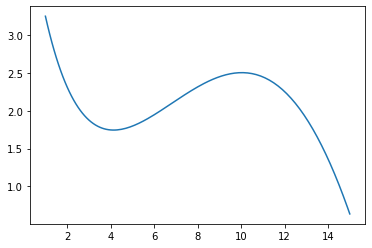

In [265]:
plt.plot(x, y)
plt.show()

Как известно, **многочлен степени n** (то есть w_0 + w_1 x + w_2 x^2 + ... + w_n x^n) **однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты w_0, ... w_n можно определить из следующей системы линейных уравнений**:



$$
\begin{cases}
  w_0 + w_1 x_1 + w_2 x_1^2 + ... + w_n x^n = f(x_1)\\
  ...\\
  w_0 + w_1 x_{n+1} + w_2 x_{n+1}^2 + ... + w_n x_{n+1}^n = f(x_{n+1})
\end{cases}\
$$


где через $$x_1, ..., x_n, x_{n+1}$$ обозначены точки, через которые проходит многочлен, а через $$f(x_1), ..., f(x_n), f(x_{n+1})$$ — значения, которые он должен принимать в этих точках.

Воспользуемся описанным свойством, и **будем находить приближение функции многочленом, решая систему линейных уравнений**.

1. Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции `scipy.linalg.solve`. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?
2. Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?
3. Повторите те же шаги для **многочлена третьей степени**, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? **Коэффициенты данного многочлена** (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются **ответом на задачу**. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)
4. **Запишите полученные числа в файл, разделив пробелами**. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-2.txt).


In [267]:
from scipy.linalg import solve

**1. Линейная аппрокимация**

In [285]:
print(x[0], y[0])
print(x[-1], y[-1])

1.0 3.252216865271419
15.000000000000012 0.6352214195786546


СЛАУ для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15:
$$
\begin{cases}
a_0 + a_1*1 = 3.252216865271419
\\a_0 + a_1*15 = 0.6352214195786546
\end{cases}\
$$

In [276]:
solve?

In [279]:
# 1. Линейная аппрокимация
# задаём СЛАУ
matrix_A = np.array([[1, 1], [1, 15]])
vector_b = np.array([y[0], y[-1]])

# решение системы
solution = solve(matrix_A, vector_b)
a_0 = solution[0]
a_1 = solution[1]

In [283]:
linear_approximation = [a_0 + a_1*xi for xi in x]

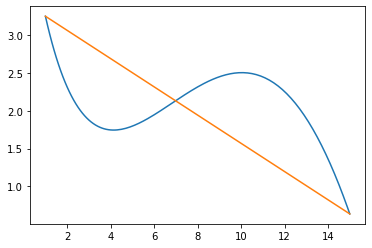

In [284]:
plt.plot(x, y)
plt.plot(x, linear_approximation)
plt.show()

**2. Аппрокимация параболой**

In [292]:
print(x[0], y[0])  # x = 1
print(x[70], y[70])  # x = 8
print(x[-1], y[-1])  # x = 15

1.0 3.252216865271419
8.000000000000007 2.316170159053225
15.000000000000012 0.6352214195786546


СЛАУ для многочлена второй степени, который должен совпадать с функцией f в точках 1 и 15:
$$
\begin{cases}
a_0 + a_1*1 + a_2*1^2 = 3.252216865271419
\\a_0 + a_1*8 + a_2*8^2= 2.316170159053225
\\a_0 + a_1*15 + a_2*15^2 = 0.6352214195786546
\end{cases}\
$$

In [294]:
# 2. Аппрокимация пораболой
# задаём СЛАУ
matrix_A = np.array([[1, 1, 1], [1, 8, 8**2], [1, 15, 15**2]])
vector_b = np.array([y[0], y[70], y[-1]])

# решение системы
solution = solve(matrix_A, vector_b)
a_0 = solution[0]
a_1 = solution[1]
a_2 = solution[2]

In [295]:
parabola_approximation = [a_0 + a_1*xi + a_2*xi**2 for xi in x]

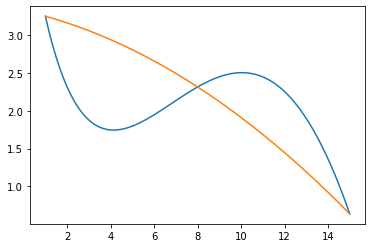

In [296]:
plt.plot(x, y)
plt.plot(x, parabola_approximation)
plt.show()

**2. Аппрокимация кубической параболой**

In [297]:
print(x[0], y[0])  # x = 1
print(x[30], y[30])  # x = 4
print(x[90], y[90])  # x = 10
print(x[140], y[140]) # x = 15

1.0 3.252216865271419
4.000000000000003 1.7468459495903674
10.000000000000007 2.505416407000246
15.000000000000012 0.6352214195786546


СЛАУ для многочлена второй степени, который должен совпадать с функцией f в точках 1 и 15:
$$
\begin{cases}
a_0 + a_1\cdot1 + a_2\cdot1^2 a_3\cdot1^3 = 3.252216865271419
\\a_0 + a_1\cdot4 + a_2\cdot4^2 + a_3\cdot4^3= 1.7468459495903674
\\a_0 + a_1\cdot10 + a_2\cdot10^2 + a_3\cdot10^3 = 2.505416407000246
\\a_0 + a_1\cdot15 + a_2\cdot15^2 + a_3\cdot15^3= 0.6352214195786546
\end{cases}\
$$

In [300]:
# 3. Аппрокимация кубической пораболой
# задаём СЛАУ
matrix_A = np.array([[1, 1, 1, 1], [1, 4, 4**2, 4**3], [1, 10, 10**2, 10**3], [1, 15, 15**2, 15**3]])
vector_b = np.array([y[0], y[30], y[90], y[140]])

# решение системы
solution = solve(matrix_A, vector_b)
a_0 = solution[0]
a_1 = solution[1]
a_2 = solution[2]
a_3 = solution[3]

In [301]:
cubic_approximation = [a_0 + a_1*xi + a_2*xi**2 + a_3*xi**3 for xi in x]

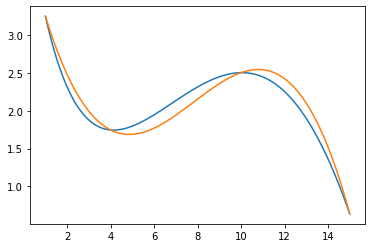

In [302]:
plt.plot(x, y)
plt.plot(x, cubic_approximation)
plt.show()

In [305]:
# запись результата в файл
with open ('linear_algebra_task-2.txt', 'w') as file:
    for i in solution:
        file.write(str(i)+' ')

In [307]:
# Проверяем, что записали
with open ('linear_algebra_task-2.txt', 'r') as file:
    for line in file:
        print(line) 

4.362641535118072 -1.295525865694844 0.19333684702151183 -0.008235651173320568 
